<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name:Aly Mohamed

Member 1 ID:40-20194

Member 1 Tutorial:T-15

Member 2 Name:

Member 2 ID:

Member 2 Tutorial:

## Imports (Don't Edit)

In [52]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Read Data

In [27]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
# Use Assignment 0 for reference.
training_data_path = "Data/Train/"
images_training = []
for i in range(1,2401):
    image_path = training_data_path + str(i) +'.jpg'
    image = plt.imread(image_path)
    im_np = np.array(image)
    im_np_flatten = im_np.flatten().reshape(1, 784)
    images_training.append(im_np_flatten)
images_training_np = np.array(images_training).reshape(2400, 784)
print(images_training_np.shape)

(2400, 784)


In [28]:
def separate_labels(images):
    labels_list = [images[start: start+240] for start in range(0, len(images), 240)]
    return labels_list

In [29]:
def calculate_mean(images):
    mean_of_list = np.round((np.sum(images, axis = 0, keepdims = True))/(len(images)), decimals=8)
    return mean_of_list

## Compute weight vectors

In [30]:
W0_All = []
W1_All = []
CL_a_list=[]
CL_b_list=[]  
M_a_list=[]
M_b_list=[]
S_a = np.zeros((784,784))
S_b = np.zeros((784,784))
data_whole = separate_labels(images_training_np)
for i in range(10):
    CL_a = data_whole[i]
    CL_a_list.append(CL_a)  
    M_a = calculate_mean(CL_a_list[i])
    M_a_list.append(M_a)   
    CL_b = [value for index,value in enumerate(data_whole) if index!= i]
    CL_b_array=np.array(CL_b).reshape(2160,784)
    CL_b_list.append(CL_b_array)       
    M_b = calculate_mean(CL_b_list[i])
    M_b_list.append(M_b)  
    S_a = S_a + np.dot((np.subtract(CL_a_list[i], M_a_list[i])).T.reshape(784,240), np.subtract(CL_a_list[i], M_a_list[i]).reshape(240,784))
    S_b = S_b + np.dot((np.subtract(CL_b_list[i], M_b_list[i])).T.reshape(784,2160), np.subtract(CL_b_list[i],M_b_list[i]).reshape(2160,784))
    Sw = S_a + S_b
    Sw_inv = np.linalg.pinv(Sw)        
    W1 = np.dot(Sw_inv,(np.subtract(M_b_list[i],M_a_list[i]).T))
    W1_All.append(W1)
    W0 = -.5 * np.dot(sum(M_a_list[i], M_b_list[i]),np.array(W1))
    W0_All.append(W0)

print(np.array(W1_All).shape)
print(W0_All)
print(np.array(W0_All).shape)


(10, 784, 1)
[array([[0.00619621]]), array([[0.0005707]]), array([[0.00079104]]), array([[0.00063721]]), array([[0.00020027]]), array([[0.00018799]]), array([[0.00026037]]), array([[0.00018952]]), array([[0.00026515]]), array([[0.00013601]])]
(10, 1, 1)


In [31]:

trained_digits = []
labels_train = np.loadtxt(training_data_path+"Training Labels.txt")
for label in range(len(labels_train)):
    Y_label_training = []
    for n in range(10):
        Y_training = (np.dot(images_training[label],W1_All[n])) + W0_All[n]
        Y_label_training.append(Y_training)
    trained_digits.append(Y_label_training.index(min(Y_label_training)))

In [32]:
testing_data_path = 'Data/Test/'
Y_All = []
list_of_images_testing = []
for u in range(1,201): 
    im_path_test = testing_data_path+ str(u) +'.jpg'
    im_test = plt.imread(im_path_test)
    im_numpy_test = np.array(im_test)
    im_numpy_flatten_test = im_numpy_test.flatten().reshape(1,784)
    list_of_images_testing.append(im_numpy_flatten_test)
list_of_images_testing_np = np.array(list_of_images_testing).reshape(200,784)

testing_label_path = 'Test Labels.txt'
testing_predictions = []
testing_labels = np.loadtxt(testing_data_path+testing_label_path)
for v in range(len(testing_labels)):
    Y_label_testing = []
    for n in range(10):
        Y_testing = (np.dot(W1_All[n].T,list_of_images_testing_np[v])) + W0_All[n]
        Y_label_testing.append(Y_testing)
    testing_predictions.append(np.argmin(Y_label_testing))

In [33]:
len(testing_predictions)

200

## Compute confusion matrix

In [57]:
# Please return a variable named confusion_matrix so the next cell would work.
#confusion_matrix = 
confusion_matrix = confusion_matrix(testing_labels, testing_predictions)
#confusion_matrix = np.array([np.histogram(testing_predictions[i],tests[i])[0] for i in range(0,10)])

## Plot confusion matrix and print accuracy (Don't edit)

Overall accuracy:  0.82


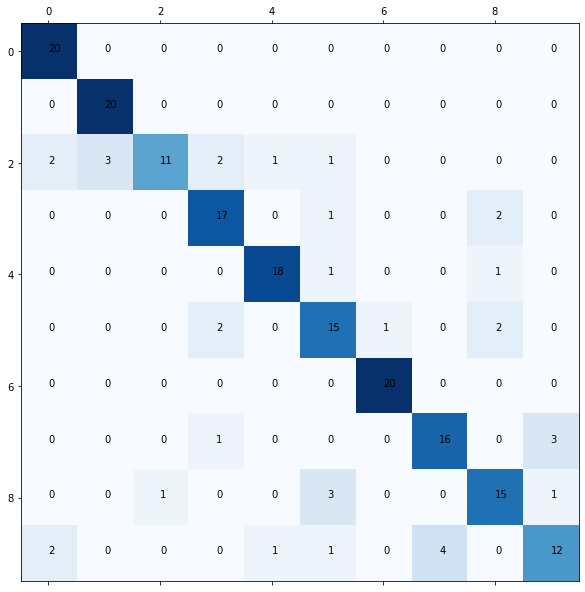

In [59]:
# PLEASE DON'T EDIT THIS CELL

plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/list_of_images_testing_np.shape[0])

## Compute bias node for each classifier

## Compute confusion matrix

In [ ]:
# Please return a variable named confusion_matrix so the next cell would work.
#confusion_matrix =

## Plot confusion matrix and print accuracy (Don't edit)

In [19]:
# PLEASE DON'T EDIT THIS CELL

# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
        
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

ValueError: not enough values to unpack (expected 2, got 0)